In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Spring Pendulum with RK45
You can find the theory and derivation in the theory folder. Also you can play the animation by running main.py file

In [43]:
def F(t, Psi):
    ## Psi[0] --> Phi
    ## Psi[1] --> Phi'
    ## Phi = [x,theta]
    x = Psi[0,0]
    x_d = Psi[1,0]
    theta = Psi[0,1]
    theta_d = Psi[1,1]
    f1 = (1+x)*theta_d**2 + np.cos(theta) - x
    f2 = (1/(1+x)) * (-np.sin(theta) - 2*x_d*theta_d)
    
    return np.array([f1,f2])

In [44]:
def G(t, Psi):
    x = Psi[0,0]
    x_d = Psi[1,0]
    theta = Psi[0,1]
    theta_d = Psi[1,1]
    g1 = np.array([x_d, theta_d])
    g2 = F(t, Psi)
    
    return np.array([g1,g2])

In [60]:
t_min = 0
t_max = 100
l = 14
N_t = 2 ** l
tList = np.linspace(t_min, t_max, N_t)
dt = tList[1] - tList[0]

Psi = np.zeros((2,2,N_t))
Psi[0,:,0] = np.array([1,0])
Psi[1,:,0] = np.array([1,-1])

In [61]:
for i, t in enumerate(tList[:-1]):
    Psi_ = Psi[:,:,i]
    f0 = G(t, Psi_)
    f1 = G(t, Psi_+f0/2*dt)
    f2 = G(t, Psi_+f1/2*dt)
    f3 = G(t, Psi_+f2*dt)
    Psi_ = Psi_+dt/6*(f0+2*f1+2*f2+f3)
    Psi[:,:,i+1] = Psi_


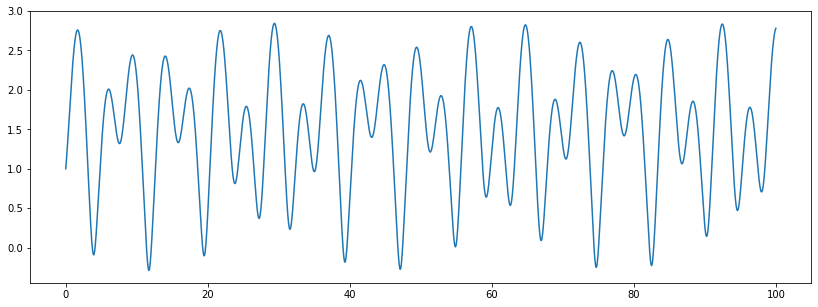

In [62]:
plt.figure(figsize=(14,5))
plt.plot(tList, Psi[0,0,:])

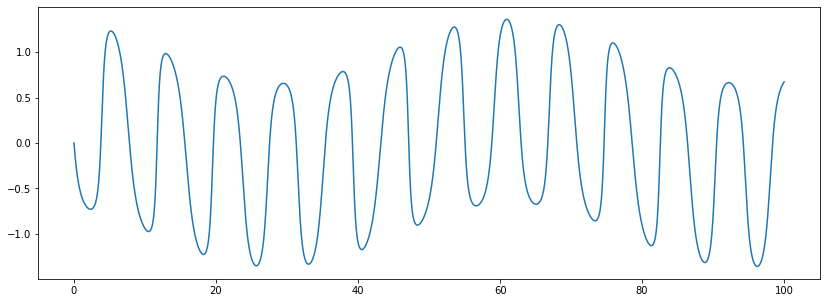

In [63]:
plt.figure(figsize=(14,5))
plt.plot(tList, Psi[0,1,:])